# **Exploring Linear Regression with the Iris Flower Dataset**

In [2]:
import os
import numpy as np
import pandas as pd
import csv
import sklearn
import matplotlib.pyplot as plt
assert sklearn.__version__ >= "0.20"

### **Get and Download the Dataset**

In [3]:
import pandas as pd

iris = pd.read_csv("/Users/raoabdul/Documents/Development/Learning-ML/Model Examples and Practice/Practice - Kaggle/Iris/Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


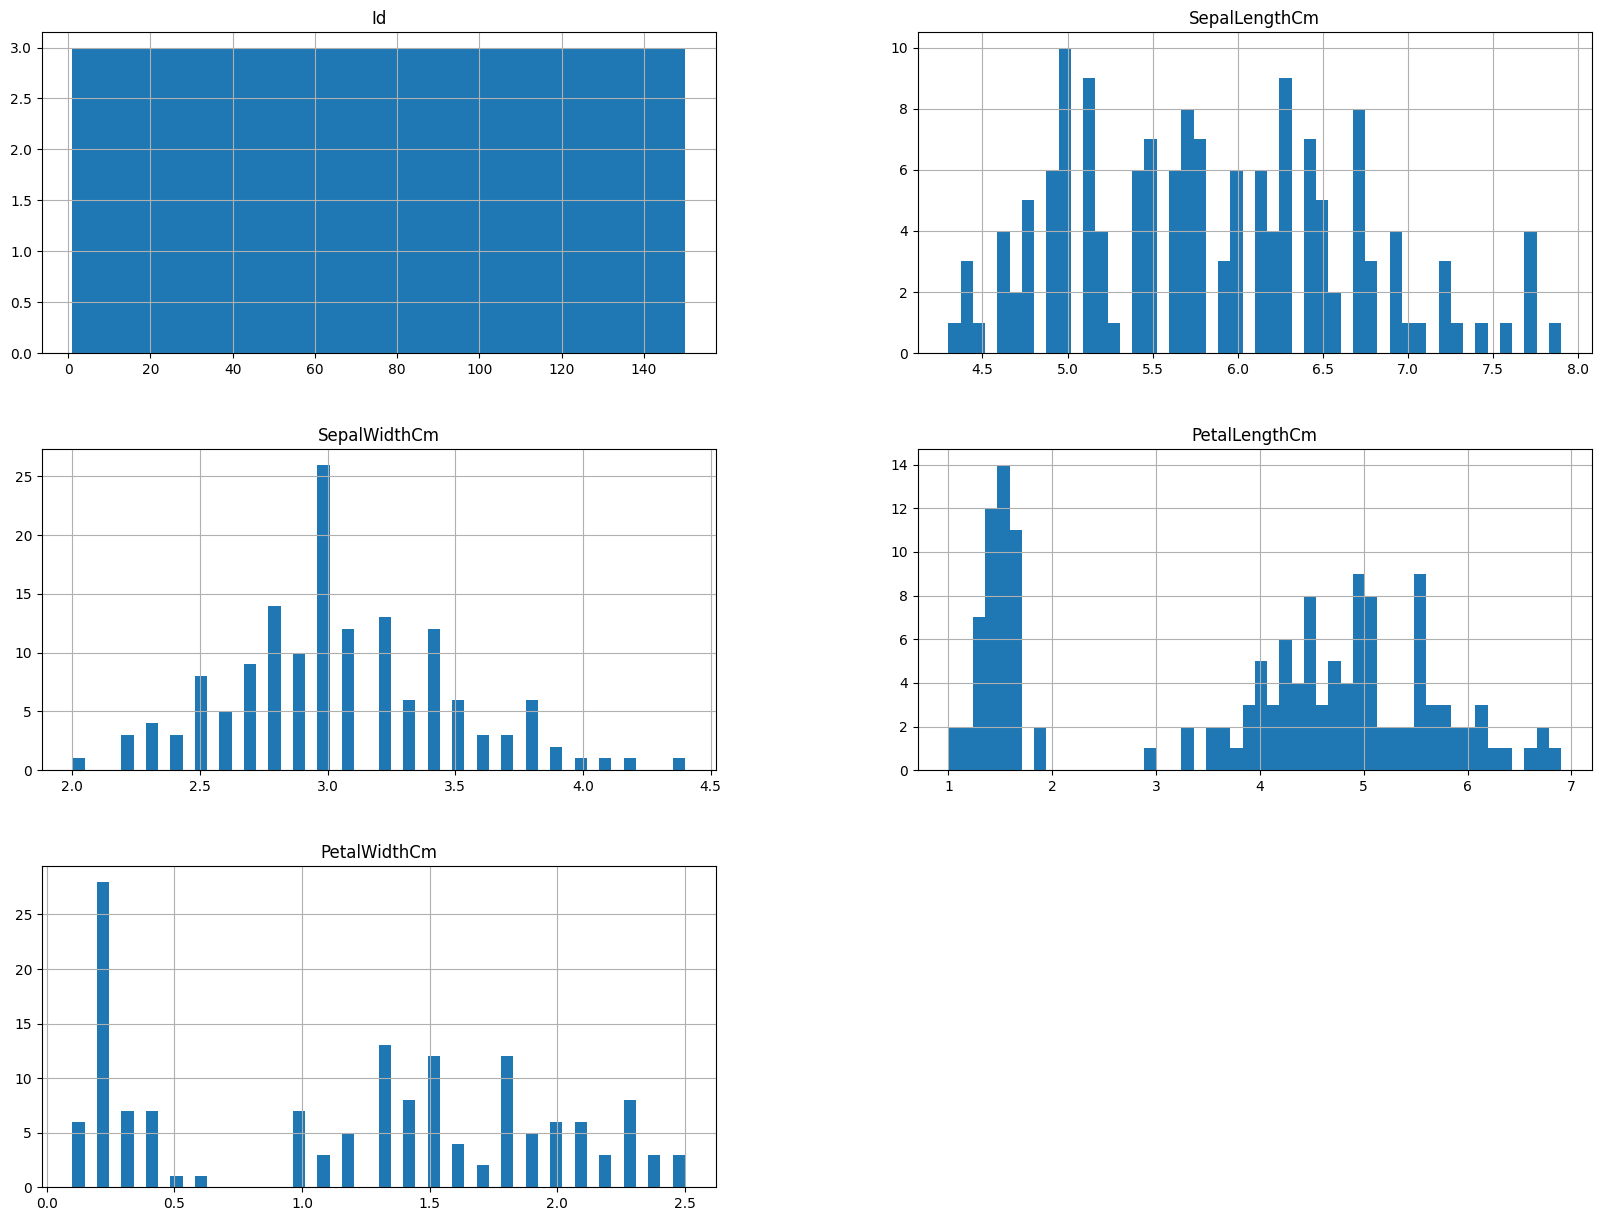

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(20,15))
plt.show()

### **Create a Test and Train Dataset**

In [7]:
import numpy as np

np.random.seed(42)

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(iris, 0.2)
len(train_set)

120

### **Discover and Visualise The Data**

In [8]:
test_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [9]:
corr_matrix = iris.corr(numeric_only=True)

corr_matrix["SepalWidthCm"].sort_values(ascending=False)

SepalWidthCm     1.000000
SepalLengthCm   -0.109369
PetalWidthCm    -0.356544
Id              -0.397729
PetalLengthCm   -0.420516
Name: SepalWidthCm, dtype: float64

array([[<Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalL

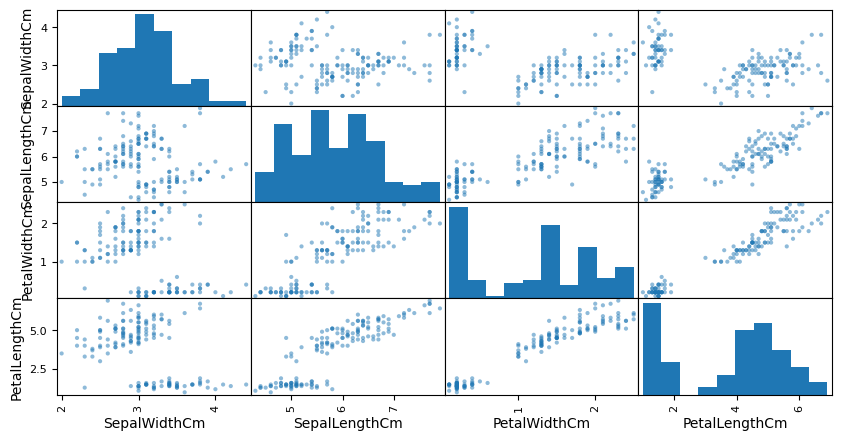

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"]
scatter_matrix(iris[attributes], figsize=(10, 5))

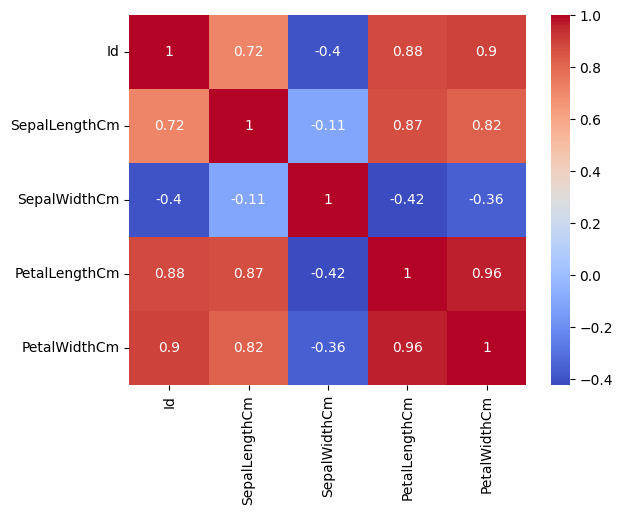

In [ ]:
# Experimenting with Attribute Combinations

import seaborn as sns

corr = iris.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

For this dataset, the following attributes have very strong correlations :

- Petal Length and Petal Width
- Sepal Length and Petal Width

### **Predicting Petal Width**

If your goal is to predict the petal width, you would take input of : petal length, sepal length with the Y axis of petal width

In [ ]:
X = iris[["PetalLengthCm", "SepalLengthCm"]]
y = iris["PetalWidthCm"]

iris["sepal_ratio"] = iris["SepalLengthCm"] / iris["SepalWidthCm"]
iris["petal_ratio"] = iris["PetalLengthCm"] / iris["PetalWidthCm"]

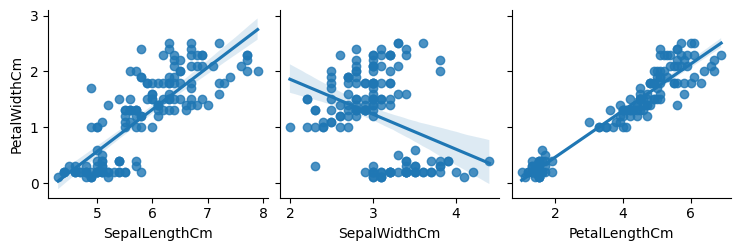

In [16]:
sns.pairplot(iris, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"], y_vars="PetalWidthCm", kind='reg')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create engineered features
iris["sepal_ratio"] = iris["SepalLengthCm"] / iris["SepalWidthCm"]
iris["petal_ratio"] = iris["PetalLengthCm"] / iris["PetalWidthCm"]

# Define the target variable
y = iris["PetalWidthCm"]

In [23]:
# Compare 3 different regression

feature_sets = {
    "basic_features": ["PetalLengthCm", "SepalLengthCm"],
    "engineered_features": ["sepal_ratio", "petal_ratio"],
    "combined_features": ["PetalLengthCm", "SepalLengthCm", "sepal_ratio", "petal_ratio"]
}

results = []

for name, features in feature_sets.items():
    X = iris[features]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate R²
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Feature_Set": name, "R2_Score": r2})

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results)
print(results_df)

           Feature_Set  R2_Score
0       basic_features  0.925209
1  engineered_features  0.715851
2    combined_features  0.934306


You can think of each “attribute set” as a different version of reality that the model sees.

For example, suppose you want to predict *PetalWidthCm*.
You could feed the model different types of information and see which gives it the best understanding of the target.

You then **train one model per feature set** and compare their accuracy (R², RMSE, etc.).
That’s literally what “comparing models with different attribute sets” means — seeing which set of features helps the model understand the world best.

Ratios, differences, products, or logarithms of features are created when you believe relationships between features carry more meaning than the features themselves.

Sometimes the *absolute size doesn’t matter as much as the proportion*.
Similarly, petal_ratio = PetalLengthCm / PetalWidthCm expresses how “slender” or “broad” the petal is — which may relate more directly to the petal’s width than raw measurements.

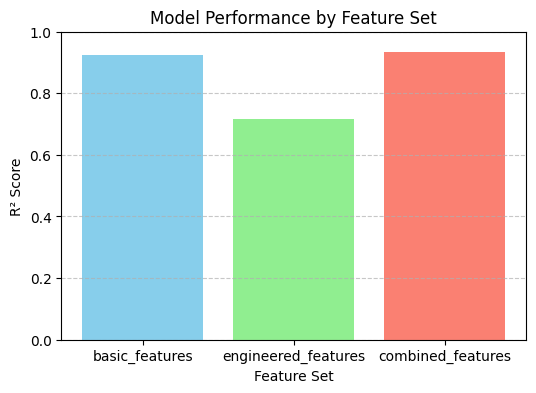

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(results_df["Feature_Set"], results_df["R2_Score"], color=["skyblue", "lightgreen", "salmon"])
plt.title("Model Performance by Feature Set")
plt.xlabel("Feature Set")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
best_features = feature_sets["combined_features"]
model = LinearRegression().fit(iris[best_features], y)
print("Feature Coefficients:")
for f, c in zip(best_features, model.coef_):
    print(f"{f}: {c:.4f}")

Feature Coefficients:
PetalLengthCm: 0.4674
SepalLengthCm: -0.0641
sepal_ratio: -0.3533
petal_ratio: -0.0409


## **Final Regression Model**

In [28]:
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"]]
y = iris["PetalWidthCm"]

from sklearn.model_selection import train_test_split

# Use the Scikit-Learn train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Root Mean Squared Error (RMSE): 0.21549501555731862
               Coefficient
SepalLengthCm    -0.237869
SepalWidthCm      0.242961
PetalLengthCm     0.536705


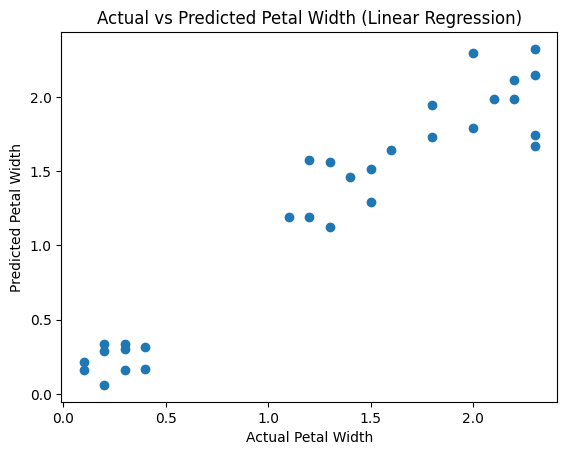

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.title("Actual vs Predicted Petal Width (Linear Regression)")
plt.show()

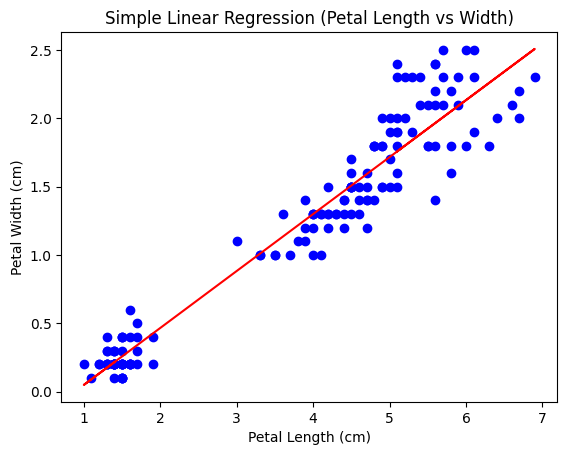

In [33]:
X_single = iris[["PetalLengthCm"]]
y = iris["PetalWidthCm"]

model_single = LinearRegression()
model_single.fit(X_single, y)

plt.scatter(X_single, y, color="blue")
plt.plot(X_single, model_single.predict(X_single), color="red")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Simple Linear Regression (Petal Length vs Width)")
plt.show()